# Błędy numeryczne

Zagadnienia:
* Reprezentacja liczb w komputerze:
    * Zapis stałoprzecinkowy,
    * Zapis zmiennoprzecinkowy (standard IEEE 754),
* Błędy numeryczne:
    * Błąd względny i bezwzględny.
    * Błąd zaokrąglenia (ang. *round-off error*).
    * Błąd obcięcia (ang. *truncation error*).
    * Błędy związane z przyjętym sposobem rozwiązywania.

## Błąd względny i bezwzględny

***Zadanie 1.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:  
* $\textrm{e}_1^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    

* $\textrm{e}_2^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

* $\textrm{e}_3^{*}=\sum\limits_{n=0}^{20} \frac{1}{n!}$  

In [1]:
import math
def oblicz_e(x):
    e = 0
    for i in range(x):
        e += 1 /math.factorial(i)
    return e

def oblicz_blad(e_star):
    blad_bezwzgledny = abs(math.e - e_star)
    blad_wzgledny = blad_bezwzgledny / abs(math.e)
    return blad_bezwzgledny, blad_wzgledny

e_star_1 = oblicz_e(6)

blad_bezwzgledny_1, blad_wzgledny_1 = oblicz_blad(e_star_1)
print("dla e1:")
print("wartosc przyblizona: ", e_star_1)
print("blad bezwzgledny: ", blad_bezwzgledny_1)
print("blad wzgledny: ", blad_wzgledny_1)

e_star_2 = oblicz_e(11)

blad_bezwzgledny_2, blad_wzgledny_2 = oblicz_blad(e_star_2)
print("dla e2:")
print("wartosc przyblizona: ", e_star_2)
print("blad bezwzgledny: ", blad_bezwzgledny_2)
print("blad wzgledny: ", blad_wzgledny_2)

e_star_3 = oblicz_e(21)

blad_bezwzgledny_3, blad_wzgledny_3 = oblicz_blad(e_star_3)
print("dla e3:")
print("wartosc przyblizona: ", e_star_3)
print("blad bezwzgledny: ", blad_bezwzgledny_3)
print("blad wzgledny: ", blad_wzgledny_3)

dla e1:
wartosc przyblizona:  2.7166666666666663
blad bezwzgledny:  0.0016151617923787498
blad wzgledny:  0.0005941848175817597
dla e2:
wartosc przyblizona:  2.7182818011463845
blad bezwzgledny:  2.7312660577649694e-08
blad wzgledny:  1.0047766310211053e-08
dla e3:
wartosc przyblizona:  2.7182818284590455
blad bezwzgledny:  4.440892098500626e-16
blad wzgledny:  1.6337129034990842e-16


## Zapis zmiennoprzecinkowy

**Uwaga**: Używane tu pojęcie **cecha** ma inne znaczenie, niż poznane być może w szkole – skrótowo: „część całkowita”. Dlatego poniżej dodawane jest inne określenie – „wykładnik”.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
print(np.finfo(float))
eps = np.finfo(float).eps

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



***Zadanie 2.***


a) Wstaw dowolną wartość do liczby x, np. 0.1. Które liczby mają tę samą mantysę, a które tę samą cechę (wykładnik)? Sprawdź wypisując ich wartości w formacie hex.


**Uwaga:** Do odczytania liczby w formacie szesnastkowym możesz wykorzystać funkcję:

In [5]:
1.25.hex()

'0x1.4000000000000p+0'

In [6]:
5000.0.hex()

'0x1.3880000000000p+12'

lub

In [7]:
import struct
def double_to_hex(f):
    print(hex(struct.unpack('<Q', struct.pack('<d', f))[0]))

In [8]:
double_to_hex(1.25)

0x3ff4000000000000


Zamianę w drugą stronę można przeprowadzić za pomocą funkcji *int*

In [9]:
int('3ff', 16)

1023

In [23]:
print(0.1.hex())
print(0.2.hex())


0x1.999999999999ap-4
0x1.999999999999ap-3




b) Porównaj zapis liczb 0.1, 0.2 i 0.3 w formacie zmiennoprzecinkowym.

* Czy można przewidzieć, czy suma 0.1 + 0.2 będzie reprezentowana dokładnie tak samo jak liczba 0.3?
* Jaki będzie wynik porównania tej sumy z liczbą 0.3 i konsekwencje użycia warunku równościowego / nierównościowego w pętli?



In [5]:
print(0.1.hex())
print(0.2.hex())
print(0.3.hex())
print((0.1+0.2).hex())
print(0.3.hex() == (0.1+0.2).hex())

# lub 
print("#######################")
x = 0.1
y = 0.2
z = x + y
print(z)
if(z==0.3):
    print('tak')
else:
    print("nie")

0x1.999999999999ap-4
0x1.999999999999ap-3
0x1.3333333333333p-2
0x1.3333333333334p-2
False
#######################
0.30000000000000004
nie


c) Przyjmijmy, że „skrótowe” określenie *liczba dokładnie reprezentowana* oznacza liczbę, która jest reprezentowana w formacie zmiennoprzecinkowym dokładnie, tzn. bez konieczności zaokrąglania.
* Ile jest liczb dokładnie reprezentowanych w przedziale $[1, 2)$?
* Zaobserwuj (z pomocą formatu hex) jakie wartości mają bity w polu mantysy w przypadku liczby 1.0.
* Jaką liczbę trzeba dodać do 1.0, aby tylko na najmłodszej pozycji pola mantysy pojawiło się 1?
* Czy wyżej otrzymana suma jest najmniejszą liczbą dokładnie reprezentowana, spośród liczb większych od 1?
* Jak przypuszczasz, jakie wartości będą miały poszczególne bity mantysy w przypadku największej liczby dokładnie reprezentowanej, której cecha (wykładnik) jest równy 0? Sprawdź, czy tak jest rzeczywiście – wpisując wartość tej liczby (jaka to jest wartość?).


In [30]:
1.0.hex()
(1.0+1.0).hex()

'0x1.0000000000000p+1'

In [9]:
print(0.0.hex())
print(1.0.hex())
print(2.0.hex())
print(5.0.hex())
print((-1.0).hex())
print((-3.0).hex())

0x0.0p+0
0x1.0000000000000p+0
0x1.0000000000000p+1
0x1.4000000000000p+2
-0x1.0000000000000p+0
-0x1.8000000000000p+1


***Zadanie 3.***

Spójrz na poniższe zjawiska, zastanów się nad ich przyczynami.

***Problem skali***

Jaki wynika da poniższy kod:

In [5]:
a = 1.0
b = 0.0000000000000000000000001
c = a + b
print(f'{c:.17f}')

1.00000000000000000
1.0


***Problem reprezentacji w zapisie binarnym*** 

In [10]:
if 0.1+0.2==0.3:
    print("True")
else:
    print("False")

False


In [11]:
suma = 0
for i in range(0,100):
    suma += 0.1
print(f'{suma:.15f}')

9.999999999999980


**Zadanie 4.**

Niech:
* $a=0.3$
* $b=10^{-13}$
* $c=a-b$
* $d=a-c$

Czy $b$ i $d$ są sobie równe w sensie analitycznym? Co z przypadkiem numerycznym? Zdefiniuj odpowiednie zmienne i porównaj wyniki. Porównaj szesnastkowe i dziesietne reprezentacje zmiennych `b` i `d`. Ile cyfr w reprezentacji `d` możemy uznać za wiarygodne?

In [6]:
a = 0.3
b = 10**(-13)
c = a-b
d = a-c

c2 = 0.3 -(10**(-13))
d2 = 0.3 - (0.3 -(10**(-13)))
# print(a)
print(b)
# print(c)
print(d)
# print(a.hex())
print(c.hex())
print(c2.hex())
print(d2.hex())
print(d.hex())
# print(d.hex())


1e-13
9.997558336749535e-14
0x1.3333333332c2ap-2
0x1.3333333332c2ap-2
0x1.c240000000000p-44
0x1.c240000000000p-44


**Zadanie 5.**

Rozważmy macierz kwadratową:
$$ A=\left[\begin{array}{ccc}
\sqrt{2} & \frac{1}{7}\\
\pi\sqrt{2} &\frac{\pi}{7}\\
\end{array}\right]
$$
* Czy jest to macierz osobliwa? Jak to sprawdzić?
* Oblicz wyznacznik tej macierzy w sposób analityczny i numeryczny (`np.linalg.det`). Czy otrzymałeś te same wartości? Czy wyniki obliczeń numerycznych prowadzą do poprawnej odpowiedzi na pierwsze pytanie? Jakie może to mieć skutki?

In [4]:
import numpy as np
import math
m = np.array(([math.sqrt(2), (1/7)],
[(math.pi)*(math.sqrt(2)), (math.pi/7)]))
print(m)
#oblizenie analityczna
det_A = (math.sqrt(2) * (math.pi/7)) - ((math.pi * math.sqrt(2)) * 1/7)
print(det_A)
#obliczenie numeryczna
np.linalg.det(m)

if det_A == np.linalg.det(m):
    print(True)
else:
    print(False)

[[1.41421356 0.14285714]
 [4.44288294 0.44879895]]
0.0
True


**Zadanie 6.**

Jedną z metod rozwiązywania równań nieliniowych jest metoda Newtona. Metoda ta powtarza obliczenia, aż spełniony nie będzie warunek stopu. Jeżeli spełnione są odpowiednie założenia to metoda ta zbiega do rozwiązania. Załóżmy, że warunki są spełnione i rozważmy funkcję $f(x)=cos(x)-x$. Poniżej znajdziesz implementację metody Newtona, w której brakuje warunku stopu. Spróbuj go uzupełnić. Warunek powinien być spełniony w momencie, w którym chcemy zakończyć działanie procedury.

Z matematycznego punktu widzenia znajdujemy się w zerze, jeżeli kolejne przybliżenia uzyskane z metody Newtona nie różnią się od siebie (np. dwa ostatnie). Zaimplementuj taki warunek i sprawdź, czy program zatrzyma się. Czy taki warunek stopu jest bezpieczny i można go stosować uniwersalnie? Jak można go poprawić?

In [ ]:
def newton(f, f_prim, x_0):
    x_prev = x_0
    while True:
        x_n=x_prev-(f(x_prev)/f_prim(x_prev))
        print(f'x_0={x_n}')
        double_to_hex(x_n)
        
        if True: # Zastąp True swoim warunkiem stopu
            return x_n
        else:
            x_prev=x_n

In [ ]:
def f(x):
    return # Uzupełnij definicję funkcji 

def f_prim(x):
    return # Uzupełnij definicję pochodnej

In [ ]:
def newton(f, f_prim, x_0, tol=1e-8, max_iter=100):
    x_prev = x_0
    for i in range(max_iter):
        x_n = x_prev - (f(x_prev) / f_prim(x_prev))
        print(f'Iteracja {i + 1}: x = {x_n}')

        if abs(x_n - x_prev) < tol:
            return x_n
        else:
            x_prev = x_n

    return x_n

def f(x):
    return math.cos(x) - x

def f_prim(x):
    return -math.sin(x) - 1 

**Zadanie domowe**  

Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi^{*} \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $,
w którym $\pi^{*}$ jest przybliżeniem liczby $\pi$ z dokładnością do 15 miejsc po przecinku.
  
Stwórz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora (do przybliżenia wartości $\pi$ możesz wykorzystać funkcję *[round](https://numpy.org/doc/stable/reference/generated/numpy.round_.html)*). Oblicz błąd bezwzględny i błąd względny otrzymanych wyników. Przedstaw rezultaty na wykresie w zależności od $n$. Wartości błędów przedstaw w skali logarytmicznej (funkcja *plt.semilogy()*).

Przeanalizuj rozwiązanie i odpowiedz na następujące pytania:  
* Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
* Jak zmienia się błąd w zależności od $n$? O czym to świadczy?
* Z jakim/jakimi rodzajami błędu mamy do czynienie?


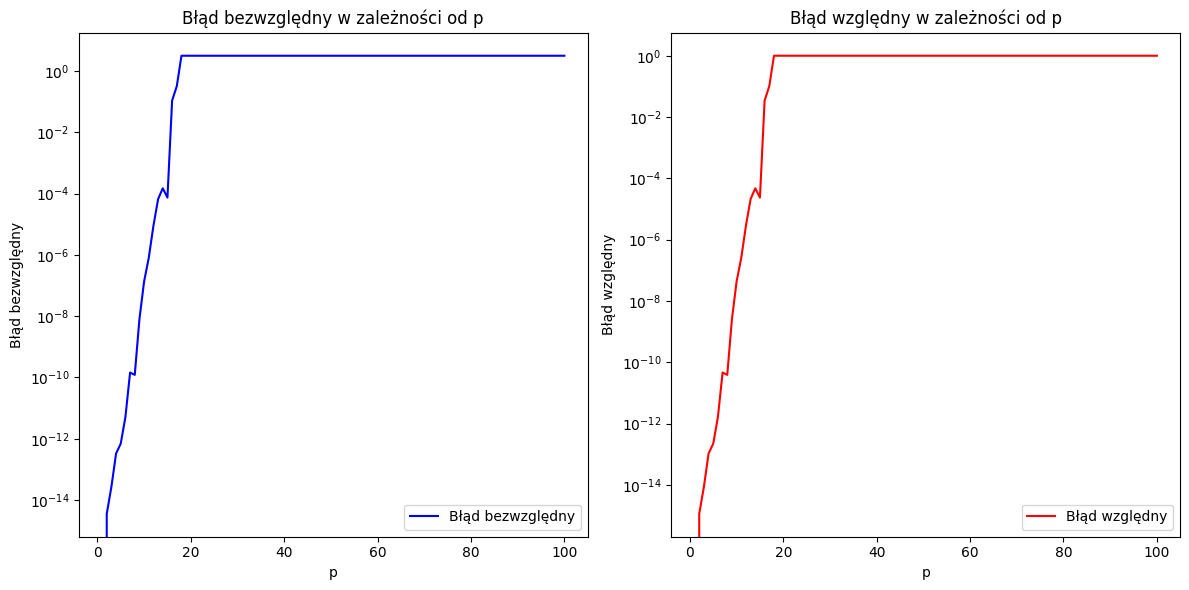

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_G_values(n):
    pi_approx = round(np.pi, 15)
    G_values = [1/p * (10**p * (1 + p * pi_approx * 10**-p) - 10**p) for p in range(1, n+1)]
    return np.array(G_values)

def calculate_errors(G_values, true_value):
    absolute_errors = np.abs(G_values - true_value)
    relative_errors = np.abs(G_values - true_value) / true_value
    return absolute_errors, relative_errors

# Parameters
n = 100
true_value = round(np.pi, 15)

# Calculations
G_values = calculate_G_values(n)
absolute_errors, relative_errors = calculate_errors(G_values, true_value)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogy(range(1, n+1), absolute_errors, 'b-', label='Błąd bezwzględny')
plt.xlabel('p')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd bezwzględny w zależności od p')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(range(1, n+1), relative_errors, 'r-', label='Błąd względny')
plt.xlabel('p')
plt.ylabel('Błąd względny')
plt.title('Błąd względny w zależności od p')
plt.legend()

plt.tight_layout()
plt.show()
